In [1]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Covid19-dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
train_dir = "/content/drive/MyDrive/Covid19-dataset/train"
test_dir = "/content/drive/MyDrive/Covid19-dataset/test"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:

total_train_samples = train_generator.samples
total_test_samples = test_generator.samples

steps_per_epoch = total_train_samples // train_generator.batch_size
validation_steps = total_test_samples // test_generator.batch_size

In [6]:
#CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [7]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=validation_steps)

Epoch 1/10
12/12 [==============================] - 28s 2s/step - loss: 1.1597 - accuracy: 0.4069 - val_loss: 1.0056 - val_accuracy: 0.3833
Epoch 2/10
12/12 [==============================] - 20s 2s/step - loss: 0.8436 - accuracy: 0.6125 - val_loss: 0.6010 - val_accuracy: 0.6833
Epoch 3/10
12/12 [==============================] - 20s 2s/step - loss: 0.4198 - accuracy: 0.8225 - val_loss: 0.4029 - val_accuracy: 0.8000
Epoch 4/10
12/12 [==============================] - 20s 2s/step - loss: 0.3518 - accuracy: 0.8658 - val_loss: 0.5329 - val_accuracy: 0.7500
Epoch 5/10
12/12 [==============================] - 21s 2s/step - loss: 0.2478 - accuracy: 0.8961 - val_loss: 0.4657 - val_accuracy: 0.8333
Epoch 6/10
12/12 [==============================] - 21s 2s/step - loss: 0.3050 - accuracy: 0.8918 - val_loss: 0.2047 - val_accuracy: 0.9167
Epoch 7/10
12/12 [==============================] - 20s 2s/step - loss: 0.1816 - accuracy: 0.9307 - val_loss: 0.4831 - val_accuracy: 0.7667
Epoch 8/10
12/12 [==

In [8]:
test_loss, test_acc = model.evaluate(test_generator, steps=validation_steps)
print('Test accuracy:', test_acc)

3/3 [==============================] - 2s 573ms/step - loss: 0.2484 - accuracy: 0.8833
Test accuracy: 0.8833333253860474


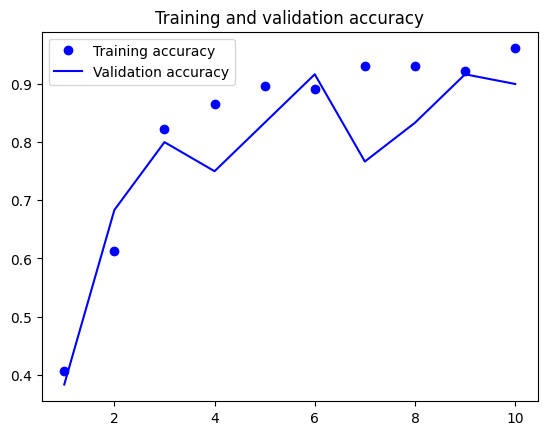

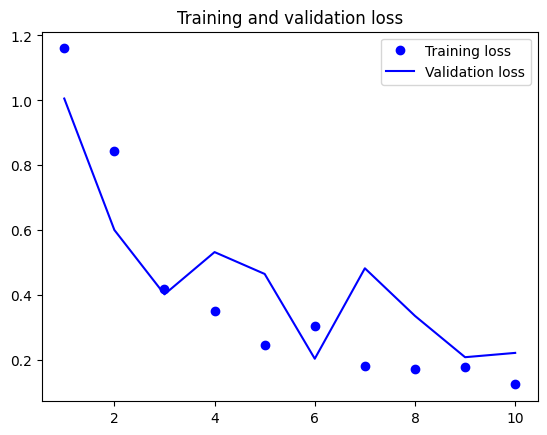

In [9]:
# Step 7: Visualize the Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()